In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

import re 
import nltk 

from sklearn.feature_extraction.text import CountVectorizer
from nltk import sent_tokenize, word_tokenize
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer

In [2]:
from sklearn.model_selection import train_test_split
from time import time

from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset
df = pd.read_csv(r"final_dataset_hinglish.csv")

# Perform data preparation
def performDataFrameManipulation():
  df = pd.read_csv(r"final_dataset_hinglish.csv")

  for index in df.index:
    if df.loc[index,"label"]==-1:
      df.loc[index,"label"]=1

  return df

In [3]:
df = performDataFrameManipulation()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['headline'], df['label'], test_size=0.33, random_state=42)

# Create a tokenizer to split the text into words
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

# Get the vocabulary size
vocab_size = len(tokenizer.word_index) + 1

# Convert the text data into sequences of words
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to have the same length
max_length = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

In [4]:
# Create the CNN-BiLSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))
model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(64, dropout=0.2)))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test))

C:\Users\thorw\miniconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
380/380 ━━━━━━━━━━━━━━━━━━━━ 49s 106ms/step - accuracy: 0.8057 - loss: 0.4137 - val_accuracy: 0.9357 - val_loss: 0.1882
Epoch 2/10
380/380 ━━━━━━━━━━━━━━━━━━━━ 40s 104ms/step - accuracy: 0.9480 - loss: 0.1495 - val_accuracy: 0.9284 - val_loss: 0.1962
Epoch 3/10
380/380 ━━━━━━━━━━━━━━━━━━━━ 39s 104ms/step - accuracy: 0.9644 - loss: 0.1039 - val_accuracy: 0.9282 - val_loss: 0.2122
Epoch 4/10
380/380 ━━━━━━━━━━━━━━━━━━━━ 45s 119ms/step - accuracy: 0.9795 - loss: 0.0698 - val_accuracy: 0.9232 - val_loss: 0.2447
Epoch 5/10
380/380 ━━━━━━━━━━━━━━━━━━━━ 42s 111ms/step - accuracy: 0.9853 - loss: 0.0501 - val_accuracy: 0.9177 - val_loss: 0.2712
Epoch 6/10
380/380 ━━━━━━━━━━━━━━━━━━━━ 44s 117ms/step - accuracy: 0.9865 - loss: 0.0411 - val_accuracy: 0.9167 - val_loss: 0.3179
Epoch 7/10
380/380 ━━━━━━━━━━━━━━━━━━━━ 41s 107ms/step - accuracy: 0.9891 - loss: 0.0372 - val_accuracy: 0.9117 - val_loss: 0.3322
Epoch 8/10
380/380 ━━━━━━━━━━━━━━━━━━━━ 43s 114ms/step - accuracy: 0.9917 - loss: 0

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 200, 128)            │       3,929,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 198, 32)             │          12,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 99, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          49,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,976,296 (45.69 MB)

 Trainable params: 3,992,098 (15.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,984,198 (30.46 MB)

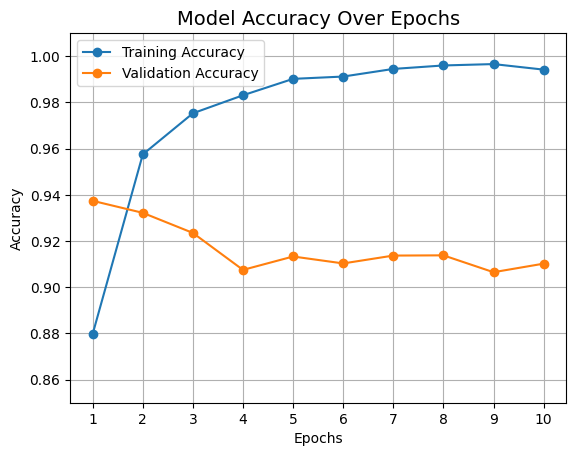

In [6]:
import matplotlib.pyplot as plt

# Example data
epochs = list(range(1, 11))
train_accuracy = [0.8798, 0.9575, 0.9753, 0.9831, 0.9902, 0.9912, 0.9945, 0.9960, 0.9966, 0.9942]
val_accuracy = [0.9374, 0.9322, 0.9235, 0.9075, 0.9133, 0.9103, 0.9137, 0.9138, 0.9065, 0.9102]

plt.plot(epochs, train_accuracy, marker='o', label='Training Accuracy')
plt.plot(epochs, val_accuracy, marker='o', label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.ylim(0.85, 1.01)
plt.legend()
plt.grid()
plt.show()

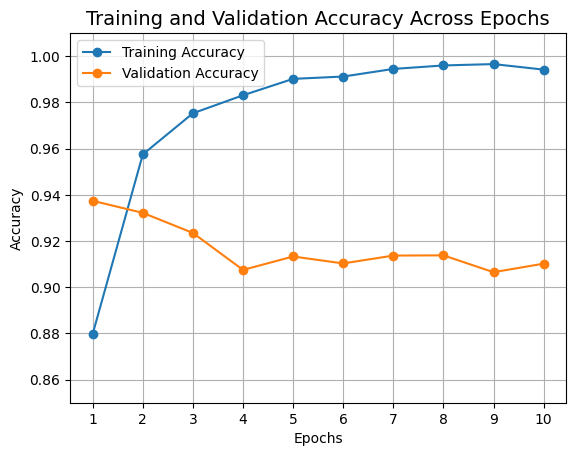

In [7]:
import matplotlib.pyplot as plt

epochs = list(range(1, 11))
train_accuracy = [0.8798, 0.9575, 0.9753, 0.9831, 0.9902, 0.9912, 0.9945, 0.9960, 0.9966, 0.9942]
val_accuracy = [0.9374, 0.9322, 0.9235, 0.9075, 0.9133, 0.9103, 0.9137, 0.9138, 0.9065, 0.9102]

plt.plot(epochs, train_accuracy, marker='o', label='Training Accuracy')
plt.plot(epochs, val_accuracy, marker='o', label='Validation Accuracy')
plt.title('Training and Validation Accuracy Across Epochs', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.ylim(0.85, 1.01)
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test accuracy: {accuracy:.3f}')

# Function to detect bullying
def detect_bullying(text):
  seq = tokenizer.texts_to_sequences([text])
  pad_seq = pad_sequences(seq, maxlen=max_length)
  prediction = model.predict(pad_seq)
  if prediction[0][1] > prediction[0][0]:
    return "The text is bullying"
  else:
    return "The text is not bullying"

188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9099 - loss: 0.4411
Test accuracy: 0.914


In [ ]:
# Input interface
while True:
  text = input("Enter a text to detect bullying (or 'quit' to exit): ")
  if text.lower() == 'quit':
    break
  print(detect_bullying(text))